# **Importing libraries and dataset**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **DataFrame & arranging data**

In [0]:
df = pd.read_csv('/content/drive/My Drive/NITD Internship/nitdata.csv', index_col='Date', parse_dates=True)

In [10]:
df

,Temperature,Humidity,Carbon Monoxide,Nitrogen Dioxide,Dust (PM2.5),Dust (PM10)
Date,,,,,,
2020-05-22 18:55:07,27,66,46,0.27,44,61
2020-05-22 18:55:01,27,66,46,0.27,43,60
2020-05-22 18:54:57,27,66,46,0.27,43,60
2020-05-22 18:54:51,27,66,46,0.27,43,60
2020-05-22 18:54:47,27,66,46,0.27,43,60
...,...,...,...,...,...,...
2020-05-16 02:06:36,23,67,44,1.43,24,34
2020-05-16 02:06:18,23,67,44,1.43,24,34
2020-05-16 02:06:01,23,67,44,1.43,23,32


# **Handling missing data**

In [0]:
# converting all 0 in df to NaN
df.replace(to_replace=0, value=np.nan, inplace=True)

**Method 1: Removing the missing value rows**

In [0]:
df1 = df.dropna()

**Method 2: Filling the missing values with mean**

In [0]:
df = df.fillna(df.mean())

# **Resampling of data**

In [0]:
# keeping only one occurence of date time and merging duplicates by doing mean of them
df = df.groupby('Date').mean()
df1 = df1.groupby('Date').mean()

In [15]:
df.head()

,Temperature,Humidity,Carbon Monoxide,Nitrogen Dioxide,Dust (PM2.5),Dust (PM10)
Date,,,,,,
2020-05-16 02:05:21,23,67,43,1.43,23.0,32.0
2020-05-16 02:05:26,23,67,44,1.43,23.0,32.0
2020-05-16 02:06:01,23,67,44,1.43,23.0,32.0
2020-05-16 02:06:18,23,67,44,1.43,24.0,34.0
2020-05-16 02:06:36,23,67,44,1.43,24.0,34.0


In [16]:
df1.head()

,Temperature,Humidity,Carbon Monoxide,Nitrogen Dioxide,Dust (PM2.5),Dust (PM10)
Date,,,,,,
2020-05-16 02:05:21,23,67,43,1.43,23.0,32.0
2020-05-16 02:05:26,23,67,44,1.43,23.0,32.0
2020-05-16 02:06:01,23,67,44,1.43,23.0,32.0
2020-05-16 02:06:18,23,67,44,1.43,24.0,34.0
2020-05-16 02:06:36,23,67,44,1.43,24.0,34.0


# **Data Visualization & comparing**

**plot with Missing value rows removed**

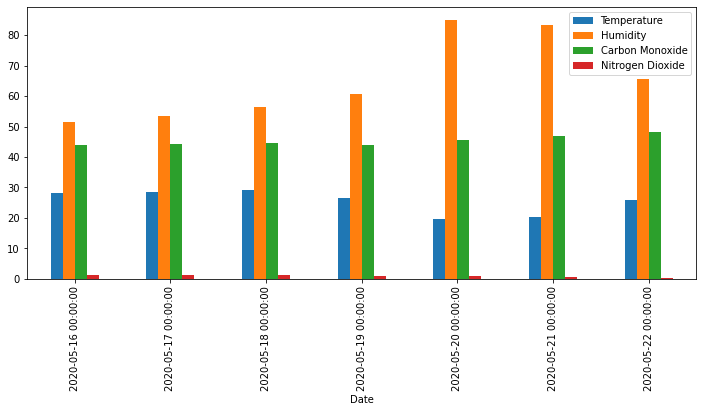

In [17]:
graph = df1[['Temperature','Humidity','Carbon Monoxide','Nitrogen Dioxide']].resample(rule='D').mean().plot.bar(figsize=(12,5));

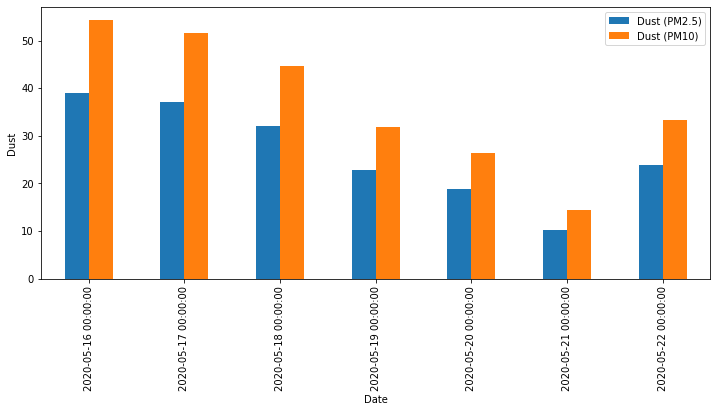

In [18]:
graph = df1[['Dust (PM2.5)','Dust (PM10)']].resample(rule='D').mean().plot.bar(figsize=(12,5));
graph.set(ylabel='Dust');

**plot with Missing values replaced with mean (can be same as above incase of no missing values)**

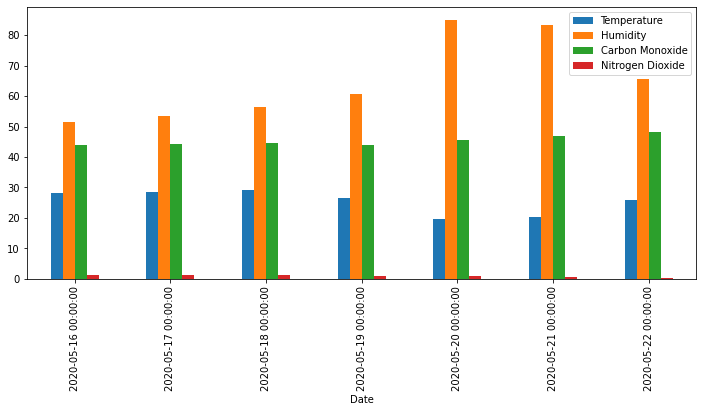

In [19]:
graph = df[['Temperature','Humidity','Carbon Monoxide','Nitrogen Dioxide']].resample(rule='D').mean().plot.bar(figsize=(12,5));

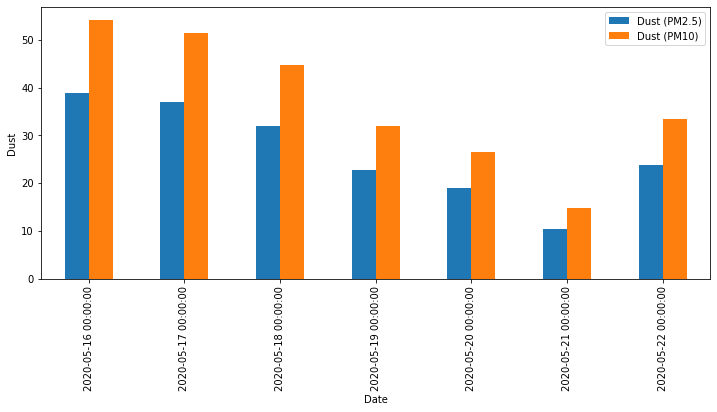

In [20]:
graph = df[['Dust (PM2.5)','Dust (PM10)']].resample(rule='D').mean().plot.bar(figsize=(12,5));
graph.set(ylabel='Dust');